<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%88%98%ED%96%89%ED%95%98%EB%8A%94_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 캐글 키, API 이용하기

In [28]:
import os
#os 선언

In [29]:
os.environ['KAGGLE_USERNAME']=
os.environ['KAGGLE_KEY']=
#kaggle키 불러오기

In [30]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


사이킷런 머신러닝 알고리즘은 NULL값을 허용하지 않으므로 NULL값을 어떻게 처리할지 결정해야한다. 

여기서는 DataFrame의 fillna() 함수를 사용해 간단하게 NULL값을 평균 또는 고정값으로 변경하겠다. Age의 경우는 평균나이, 나머지 컬럼은 'N'으로 변경하겠다.

In [33]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print("데이터 세트 Null 값 개수",titanic_df.isnull().sum())

데이터 세트 Null 값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [35]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
D37              1
E50              1
B102             1
B41              1
C91              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


다른 것들은 문제가 없는데 Cabin의 경우 N이 687건으로 가장 많은 것도 이상하지만 속성 값이 제대로 정리가 되지 않은 것 같다. 그래거 Cabin의 경우 앞 문자만 추출하겠다.

In [36]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


## <분석할 것>

- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존확률에 어떤 영향을 미치는지
- 성별에 따른 생존자 수 

In [37]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

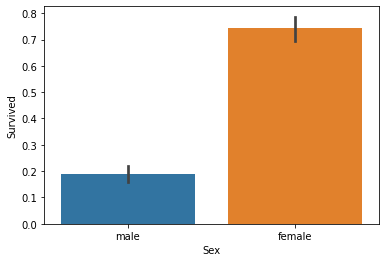

In [38]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

확실히 여성이 더 살아 남은 것을 확인 할 수 있다.

부자와 가난한 사람 간의 생존 확률은 어떨까? 부를 측정할 수 있는 속성으로 적당한 것은 클래스 등급. 

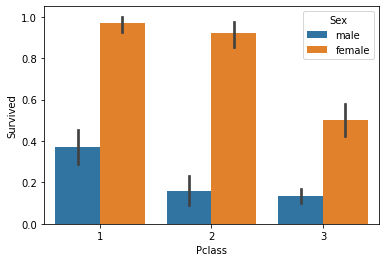

In [39]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

각 객실에서 여성이 남성보다 생존률이 모두 높았으나 객실별로 생존률은 차이가 있었다. 역시 높은 클래스의 객실일수록 생존률이 더 높았다.

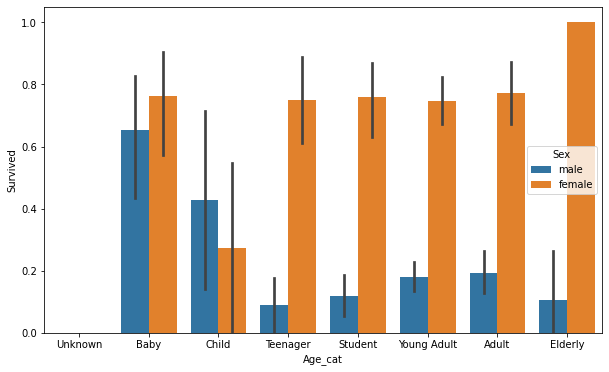

In [40]:
#입력 Age에 따라 구분 값을 반환하는 함수 설정.
def get_category(age):
  cat=''
  if age<=-1:
    cat='Unknown'
  elif age<=5:
    cat='Baby'
  elif age<=12:
    cat='Child'
  elif age<=18:
    cat='Teenager'
  elif age<=25:
    cat="Student"
  elif age<=35:
    cat="Young Adult"
  elif age<=60:
    cat="Adult"
  else:
    cat="Elderly"

  return cat

plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

분석결과 Sex, Age, Pclass등이 중요하게 생존을 좌우하는 피처임을 어느정도 확인할 수 있다. 이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하겠다. 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용하겠다. 

In [41]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들겠다. 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features()이며 Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성했다. 

In [45]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [46]:
#원본데이터 재 로딩후 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('train.csv')


In [47]:
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

In [48]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

ML알고리즘인 결정트리, 랜덤포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해보겠다. 

사이킷런은 결정트리를 위해서 DecisionTreeClassifier
랜덤포레스트를 위해 RandomForestClassifier
로지스틱 회귀를 위해 LogisticRegression 클래스를 제공

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
#결정트리, Random Forest,로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
df_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train,y_train)
df_pred=df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test,df_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#Logistic회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 :0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForest가 타 알고리즘에 비해 높은 정확도를 나타내고 있다. 아직 최적화 작업을 수행하지 않아쏙, ㄷ이터 양도 충분하지 않기 떄문에 어떤 알고리즘이 가장 성틍이 좋다고 평가할 수는 없다. 

다음으로 교차 검증으로 결텅트리 모델을 좀 더 평가해 보겠다. 교차검증을 위한 사이킷런 model_selection  패키지의 KCold클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용한다. 

먼저 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정한다.

In [58]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  #폴드 세트를 5개인 Kfold 객체를 생성, 폴드 수 만큼 예측 결과 저장ㅇ을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  #Kfold 교차 검증 수행
  for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    #X_titanic_df 데이터에서 교차 검증 별로 학습과 검증 데이터를 가리키느 index 생성
    X_train,X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    #Classifier 학습,예측, 정확도 계산
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score=np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

#exec_kfold 호출
exec_kfold(df_clf,folds=5)

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도: 0.7823


평균 정확도는 약 78.23%이다. 이번에는 교차 검증을 cross_val_score() API를 이용해 수행해보자

In [59]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(df_clf,X_titanic_df,y_titanic_df,cv=5)

for iter_count,accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

print("평균 정확도:{0:4f}".format(np.mean(scores)))



교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도:0.787929


cross_val_score()와 방금전 K폴드 평균 정확도가 약간 다른데 이는 cross_val_score()가 StracifiedKFold를 이용해 폴드 세트를 분할하기 떄문이다. 

마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해보겠다. CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth,min_samples_split,min_samples_leaf를 변경하면서 성능을 측정한다. 

In [60]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(df_clf,param_grid=parameters,scoring="accuracy",cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#gridsearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
